# Library and data import

In [32]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

import umap
import umap.plot
from sklearn.preprocessing import StandardScaler


Read in color matrix

In [33]:
# Pfade zur CSV-Datei: Color matrix without greyscale
csv_file_path = r"./Data/mapped_Matrix_addition_ohne_unbunt.csv"

# CSV-Datei lesen
df = pd.read_csv(csv_file_path, index_col=0, encoding="utf-8" )
df

Gelb  Gelbgruen     Gruen  Blaugruen  \
A_Way_Out_-                    0.173913   0.086957  0.000000   0.043478   
Ad_Infinitum_-_Pre-Order       0.000000   0.034483  0.000000   0.034483   
Adventure_Time_Finn_and        0.379310   0.482759  0.000000   0.448276   
Adventure_Time_Hey_Ice         0.611111   0.500000  0.111111   0.444444   
Adventure_Time_SONK_-          0.571429   0.357143  0.000000   0.142857   
...                                 ...        ...       ...        ...   
Ys_IX_Monstrum_Nox             0.205128   0.025641  0.102564   0.000000   
Ys_VIII_Lacrimosa_of           0.266667   0.100000  0.066667   0.033333   
Zelda_Four_Swords_Anniversary  0.441176   0.117647  0.000000   0.294118   
Zelda_II_The_Adventure         0.038462   0.692308  0.076923   0.038462   
void_tRrLM2()_Void_Terrarium   0.377778   0.088889  0.066667   0.577778   

                               Cyanblau      Blau   Violett  Rotviolett  \
A_Way_Out_-                    0.086957  0.478261  3.652174    0.000000   
Ad_Infinitum_-_Pre-Order       0.000000  0.517241  3.896552    0.000000   
Adventure_Time_Finn_and        0.482759  0.137931  2.000000    0.068966   
Adventure_Time_Hey_Ice         1.555556  0.055556  1.277778    0.000000   
Adventure_Time_SONK_-          0.142857  0.571429  1.857143    0.000000   
...                                 ...       ...       ...         ...   
Ys_IX_Monstrum_Nox             0.256410  0.358974  3.589744    0.025641   
Ys_VIII_Lacrimosa_of           0.433333  0.666667  2.033333    0.000000   
Zelda_Four_Swords_Anniversary  0.058824  1.882353  0.970588    0.000000   
Zelda_II_The_Adventure         0.115385  0.192308  3.384615    0.038462   
void_tRrLM2()_Void_Terrarium   1.244444  0.311111  0.644444    0.000000   

                               Magentarot       Rot    Orange  Gelborange  
A_Way_Out_-                      0.000000  0.043478  0.086957    0.347826  
Ad_Infinitum_-_Pre-Order         0.000000  0.000000  0.344828    0.172414  
Adventure_Time_Finn_and          0.103448  0.241379  0.275862    0.379310  
Adventure_Time_Hey_Ice           0.166667  0.055556  0.000000    0.222222  
Adventure_Time_SONK_-            0.142857  0.071429  0.642857    0.500000  
...                                   ...       ...       ...         ...  
Ys_IX_Monstrum_Nox               0.025641  0.128205  0.230769    0.051282  
Ys_VIII_Lacrimosa_of             0.066667  0.166667  0.233333    0.933333  
Zelda_Four_Swords_Anniversary    0.147059  0.264706  0.647059    0.176471  
Zelda_II_The_Adventure           0.115385  0.000000  0.038462    0.269231  
void_tRrLM2()_Void_Terrarium     0.555556  0.733333  0.355556    0.044444  

[239 rows x 12 columns]

Read in USK data

In [63]:
game_data = pd.read_csv(r"./Data/gamelist_extended.csv", encoding= "utf-8", delimiter= ";")
getting_usk = game_data[["Trailer_short", "Age"]]
getting_usk=getting_usk.rename(columns={'Age': 'USK'})
getting_usk.set_index("Trailer_short", inplace=True)
getting_usk

USK
Trailer_short                           
Inazuma_Eleven_2_Feuersturm            0
Official_Tales_of_Phantasia            0
YO-KAI_WATCH™_3_-                      0
Minit_-_Launch_Trailer                 0
Pokémon_Ranger_Trailer_-              0
...                                  ...
Syndrome_-_Launch_Trailer             18
EVERSLAUGHT_Invasion_Launch_Trailer   18
Blair_Witch_-_Official                18
TGS_2008_Resident_Evil                18
Mad_Max_-_Gameplay                    18

[256 rows x 1 columns]

In [35]:
data = df

UMAP

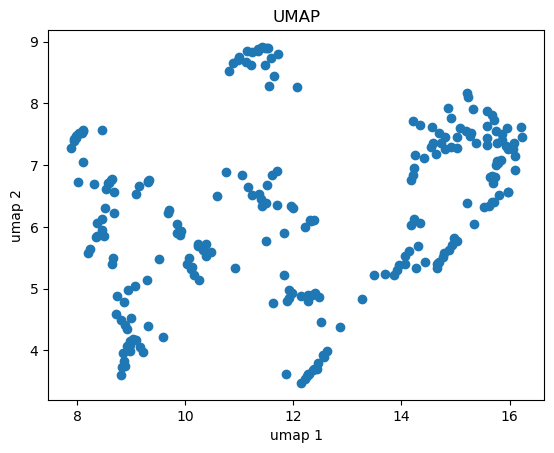

In [36]:
reducer = umap.UMAP(min_dist=0.01, metric= "correlation", n_jobs=1, random_state=1)
scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)
#print(embedding)
embedding = pd.DataFrame(embedding)
embedding.rename(columns={0: 'umap 1', 1: 'umap 2'}, inplace=True)
embedding.index = df.index
embedding
plt.scatter(embedding.iloc[:,0], embedding.iloc[:,1])
plt.title("UMAP")
plt.xlabel("umap 1")
plt.ylabel("umap 2")
plt.savefig("./Output/plot_umap.svg",bbox_inches='tight')


In [37]:
cluster_data = embedding.copy()
cluster_data

umap 1    umap 2
A_Way_Out_-                    14.807069  7.449361
Ad_Infinitum_-_Pre-Order       14.346047  6.065535
Adventure_Time_Finn_and         8.016318  6.729041
Adventure_Time_Hey_Ice          8.313828  6.698906
Adventure_Time_SONK_-          11.827722  5.222064
...                                  ...       ...
Ys_IX_Monstrum_Nox             14.919749  7.761163
Ys_VIII_Lacrimosa_of            9.926738  5.935462
Zelda_Four_Swords_Anniversary   8.843080  3.952770
Zelda_II_The_Adventure          8.032210  7.521603
void_tRrLM2()_Void_Terrarium   11.868898  3.615666

[239 rows x 2 columns]

In [38]:
# Join data sets
embedding = embedding.join(getting_usk).drop_duplicates()
embedding

umap 1    umap 2  USK
A_Way_Out_-                    14.807069  7.449361   18
Ad_Infinitum_-_Pre-Order       14.346047  6.065535   18
Adventure_Time_Finn_and         8.016318  6.729041    6
Adventure_Time_Hey_Ice          8.313828  6.698906    6
Adventure_Time_SONK_-          11.827722  5.222064    6
...                                  ...       ...  ...
Ys_IX_Monstrum_Nox             14.919749  7.761163   12
Ys_VIII_Lacrimosa_of            9.926738  5.935462   12
Zelda_Four_Swords_Anniversary   8.843080  3.952770    0
Zelda_II_The_Adventure          8.032210  7.521603    0
void_tRrLM2()_Void_Terrarium   11.868898  3.615666   12

[239 rows x 3 columns]

# K-Means

Elbow method

/opt/miniconda3/envs/dhproject/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/dhproject/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/dhproject/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/dhproject/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

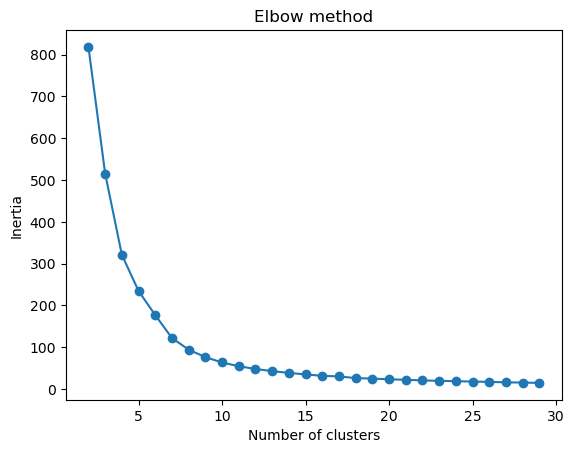

In [39]:
# Elbow method to determine best K
inertias = []

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter= 10000)
    kmeans.fit(cluster_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,30), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("./Output/kmeans_elbow.svg",bbox_inches='tight')

Find best number of clusters

In [40]:
# List to store silhouette scores for different cluster numbers
silhouette_scores = []

# Try different numbers of clusters
for n_clusters in range(2, 30):
    clustering = KMeans(n_clusters=n_clusters, random_state=0, max_iter=300, init="k-means++", n_init="auto")
    kmeans_labels =  clustering.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, kmeans_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Print silhouette scores for different cluster numbers
for n_clusters, silhouette_avg in silhouette_scores:
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"Best number of clusters: {best_n_clusters}")

For n_clusters = 2, the average silhouette_score is: 0.537833571434021
For n_clusters = 3, the average silhouette_score is: 0.45964235067367554
For n_clusters = 4, the average silhouette_score is: 0.5330769419670105
For n_clusters = 5, the average silhouette_score is: 0.5341408252716064
For n_clusters = 6, the average silhouette_score is: 0.5658929347991943
For n_clusters = 7, the average silhouette_score is: 0.5593575835227966
For n_clusters = 8, the average silhouette_score is: 0.5788109302520752
For n_clusters = 9, the average silhouette_score is: 0.5690091848373413
For n_clusters = 10, the average silhouette_score is: 0.5760524868965149
For n_clusters = 11, the average silhouette_score is: 0.5618557929992676
For n_clusters = 12, the average silhouette_score is: 0.5605308413505554
For n_clusters = 13, the average silhouette_score is: 0.5396279692649841
For n_clusters = 14, the average silhouette_score is: 0.5278300046920776
For n_clusters = 15, the average silhouette_score is: 0.532

Plot K-means

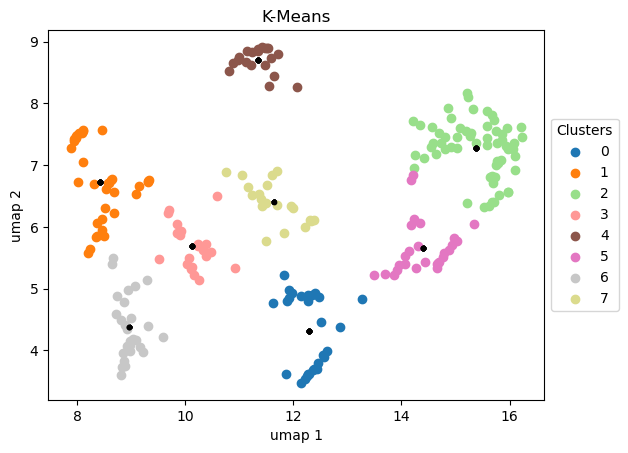

In [41]:
kmeans = KMeans(n_clusters = best_n_clusters, init= "k-means++", random_state= 0, n_init="auto", max_iter= 300, tol=0.0001).fit(cluster_data)
labels_kmeans = kmeans.labels_
inertia = kmeans.inertia_
centers = kmeans.cluster_centers_

# Add K-mans labels to data frame
embedding["kmeans labels"] = labels_kmeans

u_labels = np.unique(labels_kmeans)
 
# Plotting the results:
cmap = plt.get_cmap("tab20")
for i, label in enumerate(u_labels):
    color = cmap((i)/len(u_labels))
    plt.scatter(cluster_data.iloc[labels_kmeans == label , 0] , 
                cluster_data.iloc[labels_kmeans== label , 1] , 
                label = label, color = color )
    plt.scatter(centers[:,0] , centers[:,1] , s = 10, color = 'k')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Clusters")
plt.title("K-Means")
plt.xlabel("umap 1")
plt.ylabel("umap 2")
#plt.savefig("./Output/plot_kmeans.svg",bbox_inches='tight')
plt.show()



In [42]:
embedding

umap 1    umap 2  USK  kmeans labels
A_Way_Out_-                    14.807069  7.449361   18              2
Ad_Infinitum_-_Pre-Order       14.346047  6.065535   18              5
Adventure_Time_Finn_and         8.016318  6.729041    6              1
Adventure_Time_Hey_Ice          8.313828  6.698906    6              1
Adventure_Time_SONK_-          11.827722  5.222064    6              0
...                                  ...       ...  ...            ...
Ys_IX_Monstrum_Nox             14.919749  7.761163   12              2
Ys_VIII_Lacrimosa_of            9.926738  5.935462   12              3
Zelda_Four_Swords_Anniversary   8.843080  3.952770    0              6
Zelda_II_The_Adventure          8.032210  7.521603    0              1
void_tRrLM2()_Void_Terrarium   11.868898  3.615666   12              0

[239 rows x 4 columns]

K-means scores

In [43]:
sil_kmeans = silhouette_score(cluster_data, labels_kmeans)
davies_kmeans = davies_bouldin = davies_bouldin_score(cluster_data, labels_kmeans)
print("davies_bouldin_score", davies_kmeans)
print("silhouette_score", sil_kmeans)

davies_bouldin_score 0.5381812342657086
silhouette_score 0.57881093


<h1>DBSCAN</h1>

Find neigh_distance

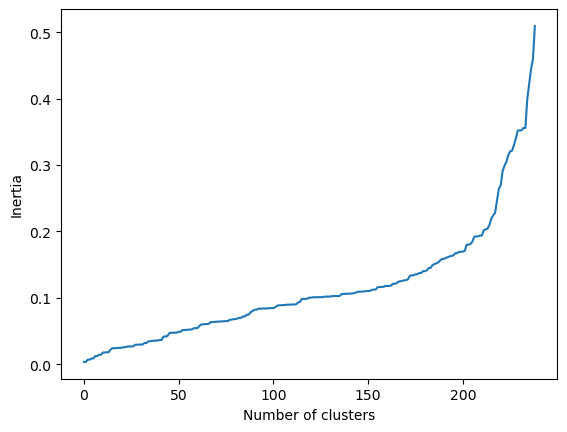

In [44]:
nbrs = NearestNeighbors(n_neighbors = 4).fit(cluster_data)

# Find the k-neighbors of a point
neigh_distance, neigh_indices = nbrs.kneighbors(cluster_data)

# Sort the neighbor distances (lengths to points) in ascending order
# The axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_distance = np.sort(neigh_distance, axis= 0 ) #axis = 0
k_dist = sort_neigh_distance[:,1]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (2nd NN)")

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("./Output/dbscan_kNN.svg",bbox_inches='tight')
plt.show()

Find best_eps

In [45]:
# Find best eps for DBSCAN
kneedle = KneeLocator(x = range(1, len(neigh_distance)+1), y = k_dist, S = 1.0, 
                      curve = "convex", direction = "increasing")
# Get the estimate of knee point
print(kneedle.knee_y)
best_eps = kneedle.knee_y

0.3557356820761493


Plot DBSCAN

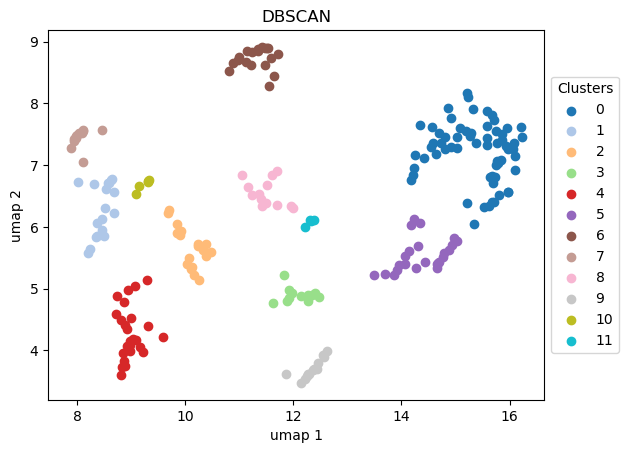

In [46]:
dbscan = DBSCAN(eps= best_eps, min_samples =4 ).fit(cluster_data)
labels_DBSCAN = dbscan.labels_

# Add DBSCAN labels to dataframe
embedding.loc[:,"DBSCAN_labels"] = labels_DBSCAN

# Remove label -1 (noise)
u_labels = np.unique(labels_DBSCAN)[1:]
 
# Plot results
for i, label in enumerate(u_labels):
    color = cmap((i)/len(u_labels))
    plt.scatter(cluster_data.iloc[labels_DBSCAN == label , 0] , 
                cluster_data.iloc[labels_DBSCAN == label , 1] , 
                label = label, color = color )
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title="Clusters")
plt.title("DBSCAN")
plt.xlabel("umap 1")
plt.ylabel("umap 2")
plt.savefig("./Output/plot_dbscan.svg",bbox_inches='tight')
plt.show()

In [47]:
embedding

umap 1    umap 2  USK  kmeans labels  \
A_Way_Out_-                    14.807069  7.449361   18              2   
Ad_Infinitum_-_Pre-Order       14.346047  6.065535   18              5   
Adventure_Time_Finn_and         8.016318  6.729041    6              1   
Adventure_Time_Hey_Ice          8.313828  6.698906    6              1   
Adventure_Time_SONK_-          11.827722  5.222064    6              0   
...                                  ...       ...  ...            ...   
Ys_IX_Monstrum_Nox             14.919749  7.761163   12              2   
Ys_VIII_Lacrimosa_of            9.926738  5.935462   12              3   
Zelda_Four_Swords_Anniversary   8.843080  3.952770    0              6   
Zelda_II_The_Adventure          8.032210  7.521603    0              1   
void_tRrLM2()_Void_Terrarium   11.868898  3.615666   12              0   

                               DBSCAN_labels  
A_Way_Out_-                                0  
Ad_Infinitum_-_Pre-Order                   5  
Adventure_Time_Finn_and                    1  
Adventure_Time_Hey_Ice                     1  
Adventure_Time_SONK_-                      3  
...                                      ...  
Ys_IX_Monstrum_Nox                         0  
Ys_VIII_Lacrimosa_of                       2  
Zelda_Four_Swords_Anniversary              4  
Zelda_II_The_Adventure                     7  
void_tRrLM2()_Void_Terrarium               9  

[239 rows x 5 columns]

Scores for DBSCAN

In [48]:
# DBSCAN scores
sil_dbscan = silhouette_score(cluster_data, labels_DBSCAN)
davies_dbscan = davies_bouldin = davies_bouldin_score(cluster_data, labels_DBSCAN)
print("davies_bouldin_score", davies_dbscan)
print("silhouette_score",sil_dbscan)

davies_bouldin_score 1.2968558305199016
silhouette_score 0.53902197


<h1>Hierarchical Clustering</h1>

Find best number of clusters

In [49]:
# List to store silhouette scores for different cluster numbers
silhouette_scores = []

# Try different numbers of clusters
for n_clusters in range(2, 30):
    clustering =  AgglomerativeClustering(n_clusters= n_clusters, metric="euclidean",linkage="ward")
    hierarchical_labels =  clustering.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, hierarchical_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Print silhouette scores for different cluster numbers
for n_clusters, silhouette_avg in silhouette_scores:
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"Best number of clusters: {best_n_clusters}")

For n_clusters = 2, the average silhouette_score is: 0.5374575853347778
For n_clusters = 3, the average silhouette_score is: 0.470935583114624
For n_clusters = 4, the average silhouette_score is: 0.5166652202606201
For n_clusters = 5, the average silhouette_score is: 0.5433019995689392
For n_clusters = 6, the average silhouette_score is: 0.5753070116043091
For n_clusters = 7, the average silhouette_score is: 0.5622811913490295
For n_clusters = 8, the average silhouette_score is: 0.5814547538757324
For n_clusters = 9, the average silhouette_score is: 0.5495012402534485
For n_clusters = 10, the average silhouette_score is: 0.5514470338821411
For n_clusters = 11, the average silhouette_score is: 0.5531691908836365
For n_clusters = 12, the average silhouette_score is: 0.5524531602859497
For n_clusters = 13, the average silhouette_score is: 0.5561489462852478
For n_clusters = 14, the average silhouette_score is: 0.5515292286872864
For n_clusters = 15, the average silhouette_score is: 0.5439

Plot Hierarchical

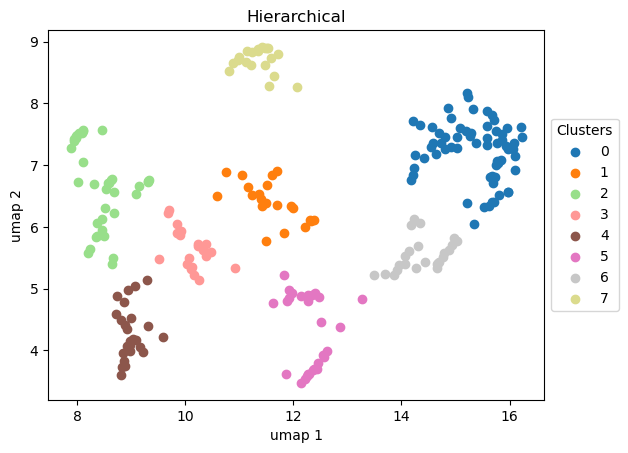

In [50]:
hierarchical_cluster = AgglomerativeClustering(n_clusters= best_n_clusters, metric="euclidean",linkage="ward")
hierarchical_labels = hierarchical_cluster.fit(cluster_data)
labels_hierarchical = hierarchical_labels.labels_

# Add labels to dataframe
embedding.loc[:,"hierarchical_labels"] = labels_hierarchical
u_labels = np.unique(labels_hierarchical)
 
# Plot results
for i, label in enumerate(u_labels):
    color = cmap((i)/len(u_labels))
    plt.scatter(cluster_data.iloc[labels_hierarchical == label , 0] , 
                cluster_data.iloc[labels_hierarchical == label , 1] , 
                label = label, color = color )
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title="Clusters")
plt.title("Hierarchical")
plt.xlabel("umap 1")
plt.ylabel("umap 2")
plt.savefig("./Output/plot_hierarchical.svg",bbox_inches='tight')
plt.show()

In [51]:
embedding

umap 1    umap 2  USK  kmeans labels  \
A_Way_Out_-                    14.807069  7.449361   18              2   
Ad_Infinitum_-_Pre-Order       14.346047  6.065535   18              5   
Adventure_Time_Finn_and         8.016318  6.729041    6              1   
Adventure_Time_Hey_Ice          8.313828  6.698906    6              1   
Adventure_Time_SONK_-          11.827722  5.222064    6              0   
...                                  ...       ...  ...            ...   
Ys_IX_Monstrum_Nox             14.919749  7.761163   12              2   
Ys_VIII_Lacrimosa_of            9.926738  5.935462   12              3   
Zelda_Four_Swords_Anniversary   8.843080  3.952770    0              6   
Zelda_II_The_Adventure          8.032210  7.521603    0              1   
void_tRrLM2()_Void_Terrarium   11.868898  3.615666   12              0   

                               DBSCAN_labels  hierarchical_labels  
A_Way_Out_-                                0                    0  
Ad_Infinitum_-_Pre-Order                   5                    6  
Adventure_Time_Finn_and                    1                    2  
Adventure_Time_Hey_Ice                     1                    2  
Adventure_Time_SONK_-                      3                    5  
...                                      ...                  ...  
Ys_IX_Monstrum_Nox                         0                    0  
Ys_VIII_Lacrimosa_of                       2                    3  
Zelda_Four_Swords_Anniversary              4                    4  
Zelda_II_The_Adventure                     7                    2  
void_tRrLM2()_Void_Terrarium               9                    5  

[239 rows x 6 columns]

Dendrogram

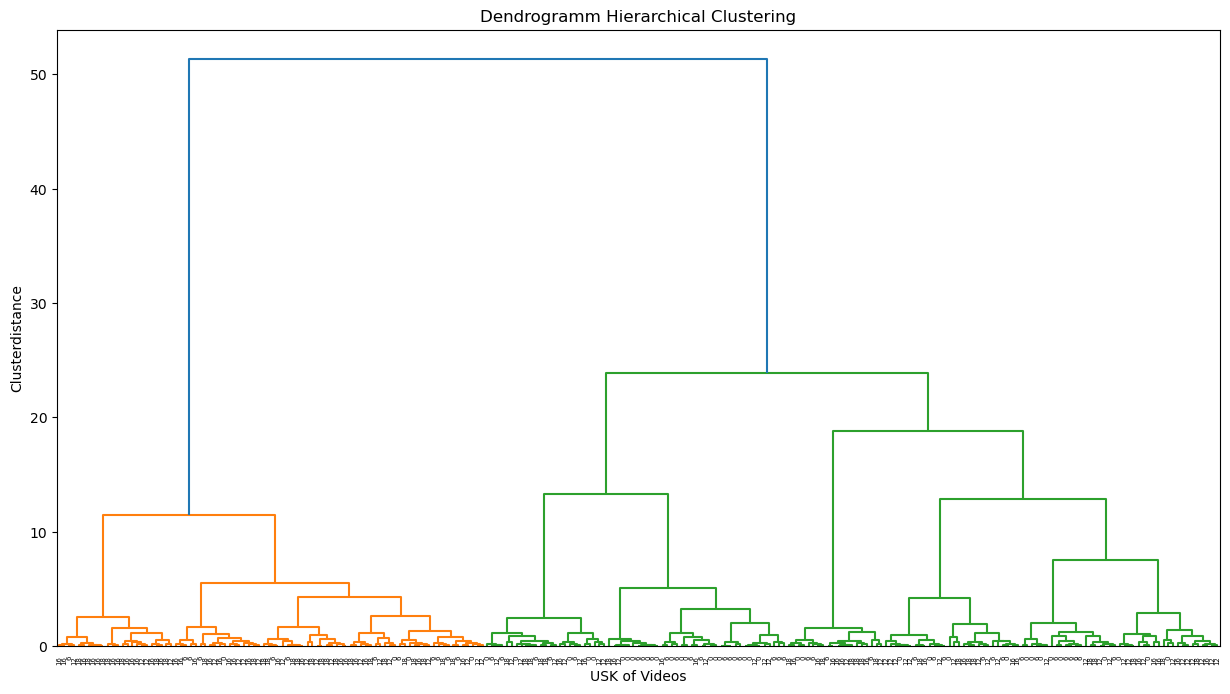

In [52]:
# Hierarchical Clustering durchführen, um die Linkage-Matrix für das Dendrogramm zu erhalten
Z = linkage(cluster_data, method="ward", metric="euclidean")

# Dendrogramm erstellen
plt.figure(figsize=(15, 8))
dendrogram(Z, leaf_rotation=90., leaf_font_size=5, labels=embedding.loc[:,"USK"].tolist()) # tolist, weil sonst Warnung, weil dendogram eine Liste erwartet und kein dataframe
plt.xlabel("USK of Videos")
plt.ylabel("Clusterdistance")
plt.title("Dendrogramm Hierarchical Clustering")
plt.show()

Scores for Hierarchical Clustering

In [53]:
sil_hierarchical = silhouette_score(cluster_data, labels_hierarchical)
davies_hierarchical = davies_bouldin = davies_bouldin_score(cluster_data, labels_hierarchical)
print("davies_bouldin_score", davies_hierarchical)
print("silhouette_score",sil_hierarchical)

davies_bouldin_score 0.5249857675524121
silhouette_score 0.58145475


Scores for all clustering methods

In [54]:
scores_df = pd.DataFrame({'Score':["Silhouette","Davies-Bouldin"]})
scores_df.set_index('Score', inplace=True)
scores_df["K-Means"]= [sil_kmeans, davies_kmeans]
scores_df["DBSCAN"]= [sil_dbscan, davies_dbscan]
scores_df["Hierarchical"]= [sil_hierarchical, davies_hierarchical]
scores_df.to_csv("./Output/scores.csv")
scores_df


K-Means    DBSCAN  Hierarchical
Score                                           
Silhouette      0.578811  0.539022      0.581455
Davies-Bouldin  0.538181  1.296856      0.524986

In [55]:
scores_df_trans = scores_df.transpose()
scores_df_trans.to_csv("./Output/scores2.csv")
scores_df_trans

Score         Silhouette  Davies-Bouldin
K-Means         0.578811        0.538181
DBSCAN          0.539022        1.296856
Hierarchical    0.581455        0.524986

# Distributed bar charts

K-means

In [56]:
kmeans_plot = embedding.loc[:,["USK", "kmeans labels"]]
kmeans_plot

USK  kmeans labels
A_Way_Out_-                     18              2
Ad_Infinitum_-_Pre-Order        18              5
Adventure_Time_Finn_and          6              1
Adventure_Time_Hey_Ice           6              1
Adventure_Time_SONK_-            6              0
...                            ...            ...
Ys_IX_Monstrum_Nox              12              2
Ys_VIII_Lacrimosa_of            12              3
Zelda_Four_Swords_Anniversary    0              6
Zelda_II_The_Adventure           0              1
void_tRrLM2()_Void_Terrarium    12              0

[239 rows x 2 columns]

Count USK per K-Means label

In [57]:
count_USK = kmeans_plot.groupby(["kmeans labels","USK"]).size().unstack(fill_value=0).stack().reset_index(name = "count")

df_kmeans = count_USK.pivot(index="kmeans labels", columns="USK", values='count')
df_kmeans

USK            0   6   12  16  18
kmeans labels                    
0               4   6  10   4   4
1              13  13   5   3   1
2               4  10  15  15  17
3               6   8   4   0   3
4               2   4   2   6   6
5               0   2   4  13   8
6               7   5   8   2   5
7               3   0  10   5   2

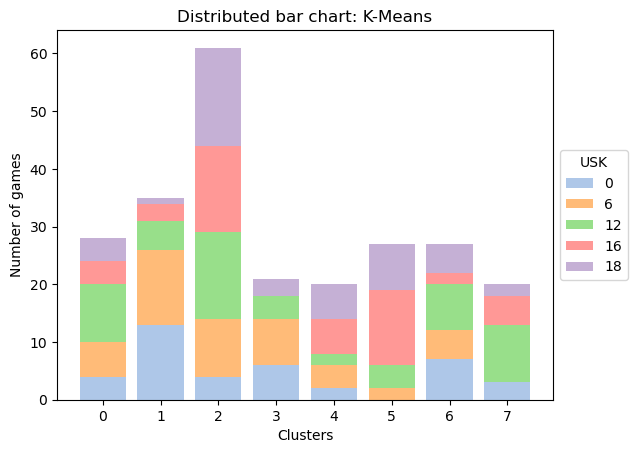

In [58]:
labels_kmeans = df_kmeans.index.tolist()
N = len(labels_kmeans)
usk_list = count_USK["USK"].unique().tolist()

barWidth = .5
xloc = np.arange(N)

# gestapeltes Balkendiagramm anzeigen
for i in range(len(usk_list)):
    plt.bar(xloc, df_kmeans.iloc[:,i], bottom=df_kmeans.iloc[:,0:i].sum(axis=1),color = cmap((2*i+1)/20))
    
plt.legend(usk_list, loc="center left", bbox_to_anchor=(1, 0.5), title="USK")
plt.xlabel("Clusters")
plt.ylabel("Number of games")
plt.title("Distributed bar chart: K-Means")

plt.savefig("./Output/barchart_kmeans.svg",bbox_inches='tight')
plt.show()

DBSCAN

In [59]:
DBSCAN_plot = embedding.loc[:,["USK", "DBSCAN_labels"]]
count_USK = DBSCAN_plot.groupby(["DBSCAN_labels","USK"]).size().unstack(fill_value=0).stack().reset_index(name = "count").copy()

#remove -1 label
df_dbscan = count_USK.pivot(index="DBSCAN_labels", columns="USK", values='count').iloc[1:,:]
df_dbscan

USK            0   6   12  16  18
DBSCAN_labels                    
0               4  10  15  16  18
1               6   6   4   2   0
2               5   8   3   0   2
3               1   3   3   3   2
4               5   5   8   2   5
5               0   1   4  12   7
6               2   3   2   6   6
7               5   4   1   1   1
8               2   0   7   3   1
9               2   3   6   1   1
10              2   3   0   0   0
11              1   0   2   0   1

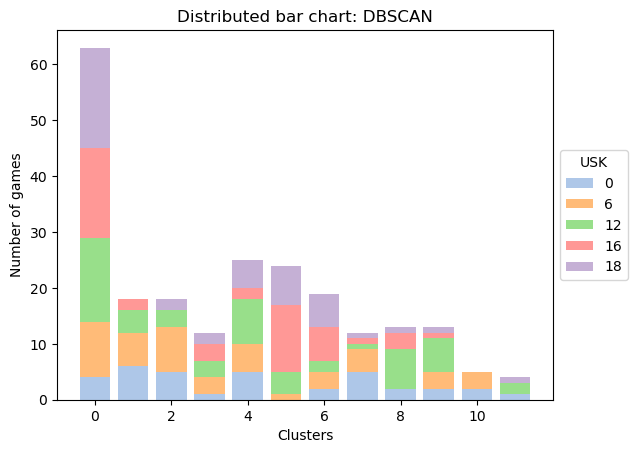

In [60]:
labels_dbscan = df_dbscan.index.tolist()
N = len(labels_dbscan)

barWidth = .5
xloc = labels_dbscan

# gestapeltes Balkendiagramm anzeigen
for i in range(len(usk_list)):
    plt.bar(xloc, df_dbscan.iloc[:,i], bottom=df_dbscan.iloc[:,0:i].sum(axis=1),color = cmap((2*i+1)/20))
plt.legend(usk_list, loc="center left", bbox_to_anchor=(1, 0.5), title="USK")
plt.xlabel("Clusters")
plt.ylabel("Number of games")
plt.title("Distributed bar chart: DBSCAN")
plt.savefig("./Output/barchart_dbscan.svg",bbox_inches='tight')
plt.show()

Hierarchical

In [61]:
hierarchical_plot = embedding.loc[:,["USK", "hierarchical_labels"]]
count_USK= hierarchical_plot.groupby(["hierarchical_labels","USK"]).size().unstack(fill_value=0).stack().reset_index(name = "count").copy()
df_hierarchical = count_USK.pivot(index="hierarchical_labels", columns="USK", values='count')
df_hierarchical



USK                  0   6   12  16  18
hierarchical_labels                    
0                     4  11  15  16  18
1                     3   0  10   5   3
2                    15  13   5   3   1
3                     6   8   4   0   2
4                     5   5   8   2   5
5                     4   6  10   4   4
6                     0   1   4  12   7
7                     2   4   2   6   6

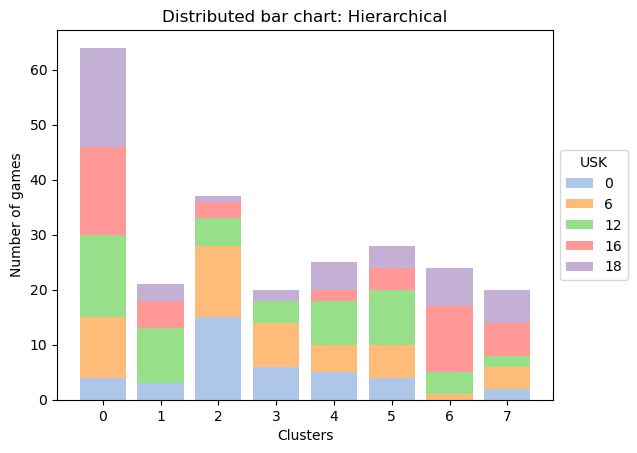

In [62]:
labels_hierarchical = df_hierarchical.index.tolist()

N = len(labels_hierarchical)

barWidth = .5
xloc = labels_hierarchical

# gestapeltes Balkendiagramm anzeigen
for i in range(len(usk_list)):
    plt.bar(xloc, df_hierarchical.iloc[:,i], bottom=df_hierarchical.iloc[:,0:i].sum(axis=1),color = cmap((2*i+1)/20))
plt.legend(usk_list, loc="center left", bbox_to_anchor=(1, 0.5),title="USK")
plt.xlabel("Clusters")
plt.ylabel("Number of games")
plt.title("Distributed bar chart: Hierarchical")
plt.savefig("./Output/barchart_hierarchical.svg",bbox_inches='tight')
plt.show()